### **Introduction**  

Forest fires pose a significant threat to ecosystems, biodiversity, and human settlements, especially in regions with hot and dry climates. Algeria, located in North Africa, frequently experiences devastating wildfires, particularly during the summer months. The **Algerian Forest Fire Dataset**, commonly used in machine learning and environmental studies, was created to analyze and predict fire occurrences based on meteorological and environmental factors (Foughali & Lounis, 2018).  

The dataset consists of **meteorological parameters** such as temperature, humidity, wind speed, and rainfall, along with **fire occurrence labels**. It is divided into two regions: **Bejaia and Sidi Bel-Abbes**, each representing different climatic conditions. Researchers use this dataset for developing predictive models to improve early fire detection and mitigation strategies (Benzineb et al., 2020). Given the increasing frequency of wildfires due to climate change, leveraging machine learning techniques with this dataset can enhance fire risk assessment and prevention measures.  

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)

### **References**  
- Foughali, A. & Lounis, M. (2018). *A dataset for forest fire detection and prediction in Algeria*. Retrieved from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset).  
- Benzineb, A., Chikhi, S., & Amrouche, B. (2020). *Forest fire risk prediction using machine learning models: A case study of Algeria*. Environmental Monitoring and Assessment, 192(5), 305.  

Would you like me to refine it further or add specific details?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

We can see some of the columns has redundent spaces that hampers natural calling of the feature. So we strip all the columns from whitespaces.

In [8]:
df.columns = [ col.strip() for col in df.columns]

### Fixing Data Type

We see all of the data types are object but except `Classes` all of them should have been numeric.

In [11]:
def detect_string_values(df:pd.DataFrame) -> pd.Series:
    num_cols = df.columns
    temp_df = pd.DataFrame()
    for col in num_cols:
        temp_df[col] = pd.to_numeric(df[col],errors='coerce').isna()
    return temp_df.any(axis=1)

In [12]:
filter =  detect_string_values(df[df.columns[:-1]])
df[filter]

day  month  year  Temperature   RH   Ws   Rain  \
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    
167                             14     07  2012           37   37   18    0.2   

     FFMC   DMC      DC   ISI   BUI      FWI    Classes  
122   NaN   NaN     NaN   NaN   NaN      NaN        NaN  
123  FFMC   DMC      DC   ISI   BUI      FWI  Classes    
167  88.9  12.9  14.6 9  12.5  10.4  fire           NaN

These three rows contains string data in numeric columns. Row 122,123 marks the beginnig of the 2nd dataset. In row 167 we see the data has been shifted upto the coulmn `DC`. Where column `DC` is a string because of the space it contains. The space may be the result of a mistake. Insted of a space there should have been a comma in the original csv file.

We first drop rows 122,123.

In [15]:
df.drop([122,123],inplace=True)

And then we fix the problem in row 167 byshifting the values.

In [17]:
df.loc[167,['ISI','BUI','FWI','Classes']] = df.loc[167,['ISI','BUI','FWI','Classes']].shift() 

In [18]:
df.loc[167,['DC','ISI']]=[float(x) for x in df.DC[167].split()]

In [19]:
filter =  detect_string_values(df[df.columns[:-1]])
df[filter]

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes]
Index: []

As we fix the anomalous objects we safely cast float data type to all the numeric columns and cast best data type.

In [21]:
df.iloc[:,:-1] = df.iloc[:,:-1].astype('float')

In [22]:
df = df.convert_dtypes()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    Int64  
 1   month        244 non-null    Int64  
 2   year         244 non-null    Int64  
 3   Temperature  244 non-null    Int64  
 4   RH           244 non-null    Int64  
 5   Ws           244 non-null    Int64  
 6   Rain         244 non-null    Float64
 7   FFMC         244 non-null    Float64
 8   DMC          244 non-null    Float64
 9   DC           244 non-null    Float64
 10  ISI          244 non-null    Float64
 11  BUI          244 non-null    Float64
 12  FWI          244 non-null    Float64
 13  Classes      244 non-null    string 
dtypes: Float64(7), Int64(6), string(1)
memory usage: 39.8 KB


### Encoding Regions

Our dataset is sourced from two regions. Row 0-121 is form Bejaia Region and 124-245 is Sidi-Bel-Abbes Region. We are encoding these rgions in new `regions` feature.

In [26]:
df.loc[:122,'regions']= 'Bejaia'

In [27]:
df.loc[124:,'regions']= 'Sidi-Bel-Abbes'

### Arranging Dates

`day`,`month`,`year` columns can be turned into a single datetime column.

In [30]:
df.insert(0,'Date',pd.to_datetime(df[['year','month','day']]))

In [31]:
df.drop(columns=['day','month','year'],inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         244 non-null    datetime64[ns]
 1   Temperature  244 non-null    Int64         
 2   RH           244 non-null    Int64         
 3   Ws           244 non-null    Int64         
 4   Rain         244 non-null    Float64       
 5   FFMC         244 non-null    Float64       
 6   DMC          244 non-null    Float64       
 7   DC           244 non-null    Float64       
 8   ISI          244 non-null    Float64       
 9   BUI          244 non-null    Float64       
 10  FWI          244 non-null    Float64       
 11  Classes      244 non-null    string        
 12  regions      244 non-null    object        
dtypes: Float64(7), Int64(3), datetime64[ns](1), object(1), string(1)
memory usage: 37.2+ KB


### Fixing `Classes` Feature

In [34]:
df.Classes.unique()

<StringArray>
[  'not fire   ',       'fire   ',          'fire',         'fire ',
      'not fire',     'not fire ', 'not fire     ',  'not fire    ']
Length: 8, dtype: string

Several Values have white spaces prventing the feature from having only two classes

In [36]:
df['Classes'] = df.Classes.str.strip()

In [37]:
df['Classes'].unique()

<StringArray>
['not fire', 'fire']
Length: 2, dtype: string

In [38]:
df.to_csv('cleaned_algeriean_forest_fire.csv',index=False)

## EDA

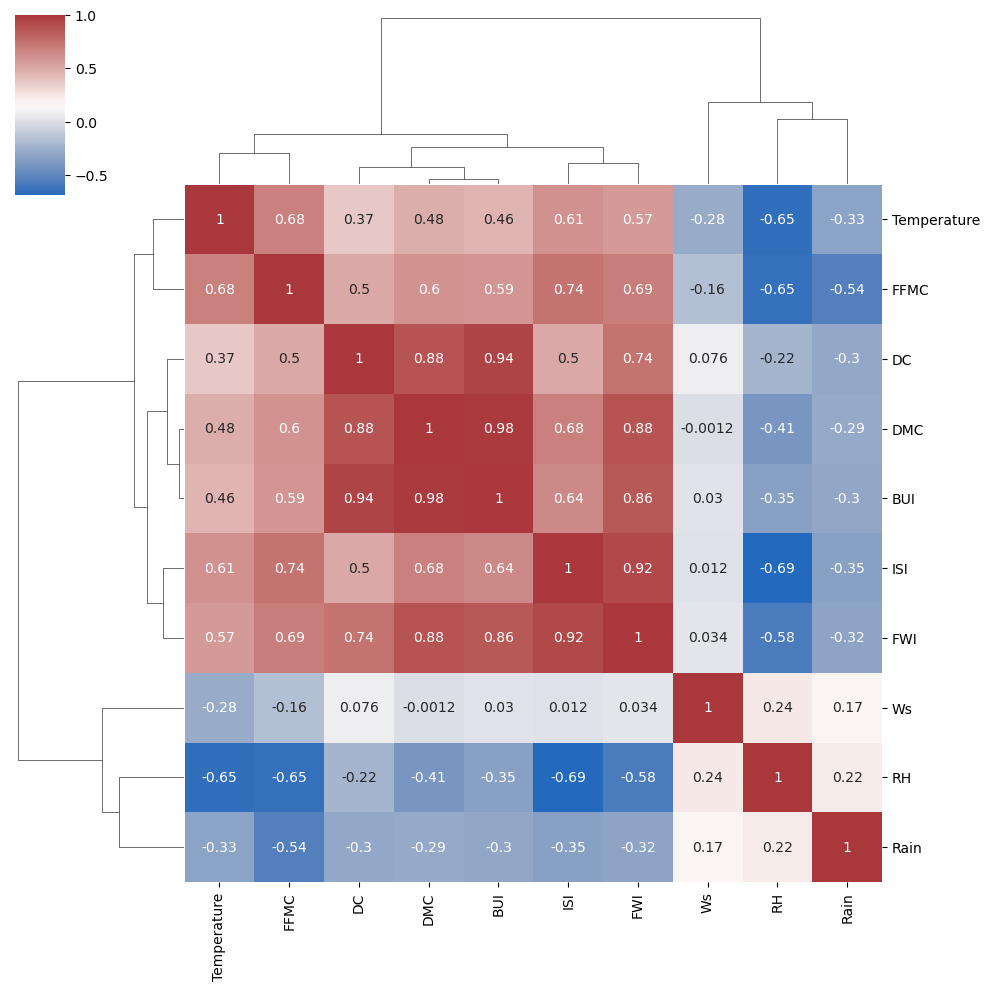

In [40]:
sns.clustermap(df.drop(columns=['Date','Classes','regions']).corr(),annot=True,cmap='vlag')

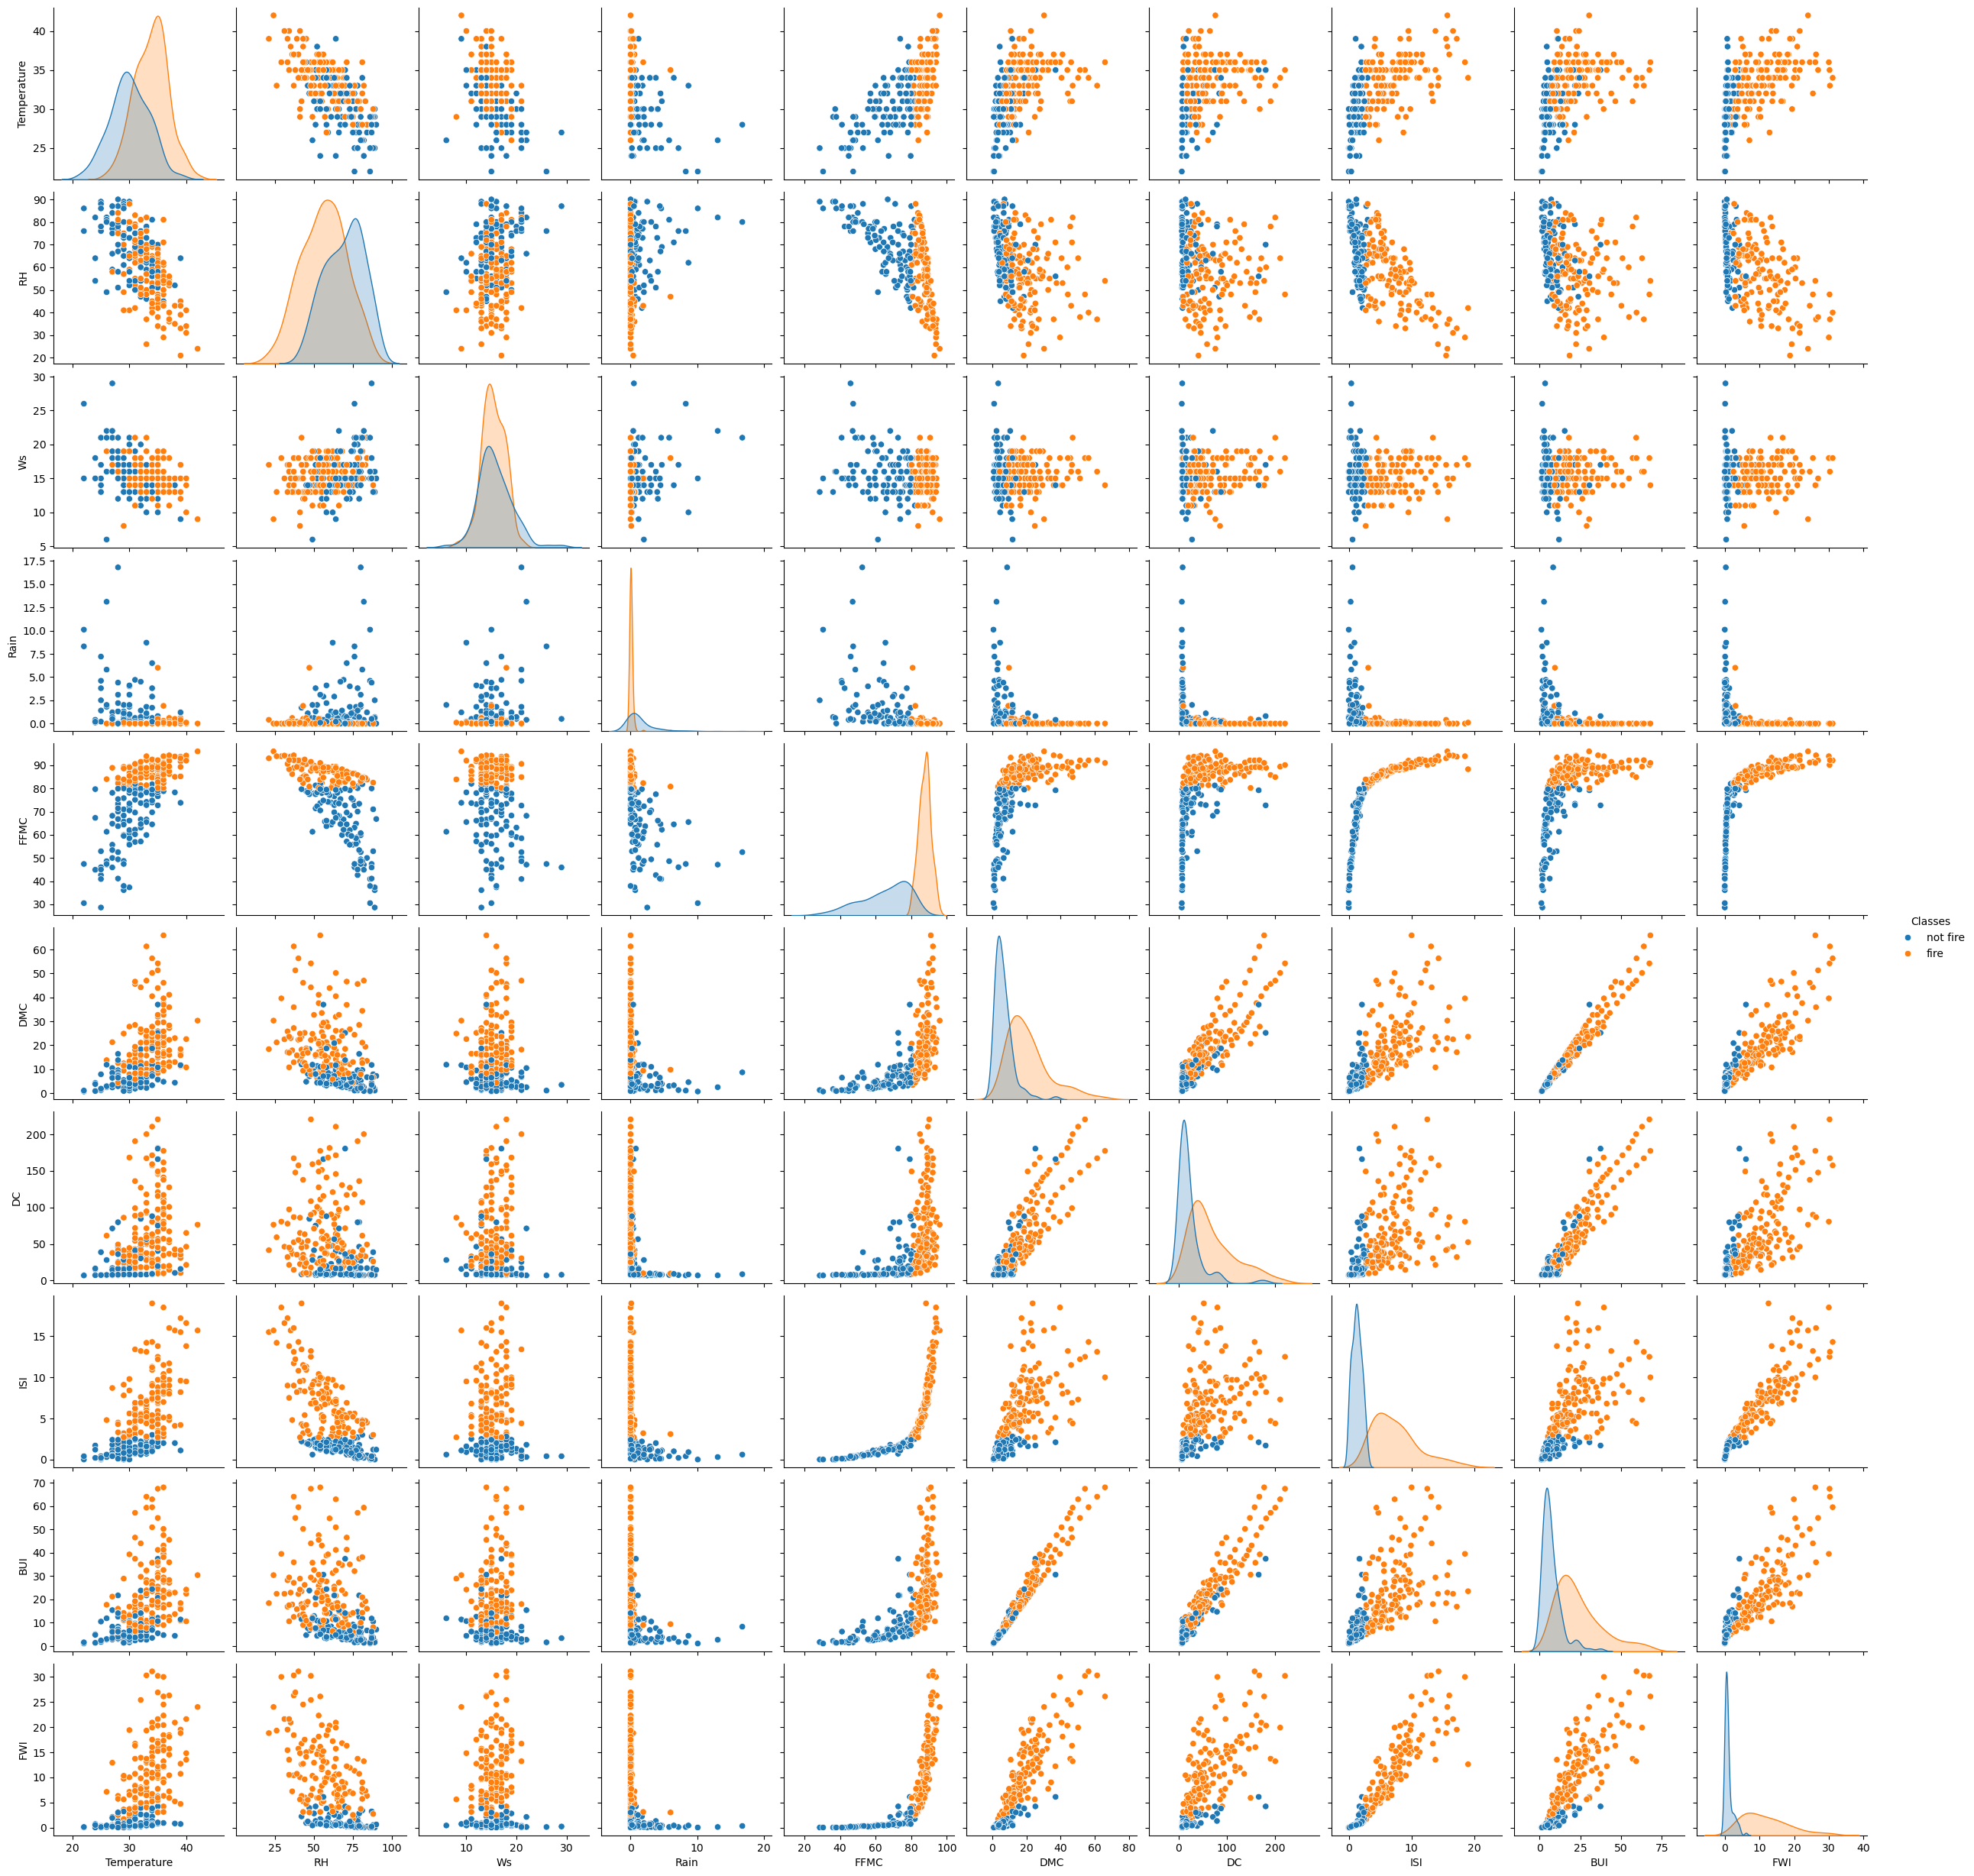

In [41]:
sns.pairplot(df.iloc[:,1:12],hue='Classes')

In [42]:
cls_val_cnt = df.Classes.value_counts(normalize=True)

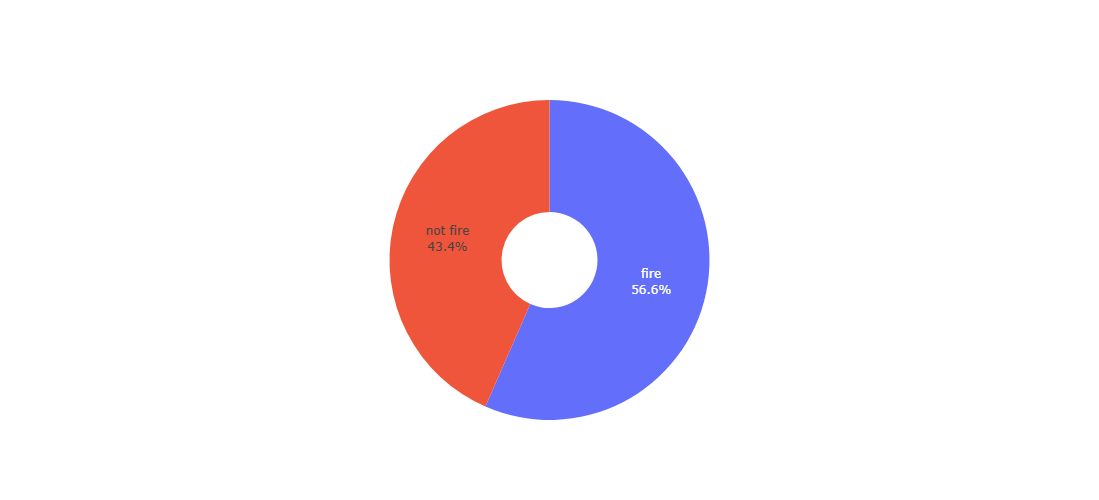

In [43]:
fig = go.Figure(data=[go.Pie(labels=cls_val_cnt.index,values=cls_val_cnt.values,hole=0.3,textinfo='label+percent')])
fig.update_layout(height=500,width=1000,showlegend=False)
fig.show()

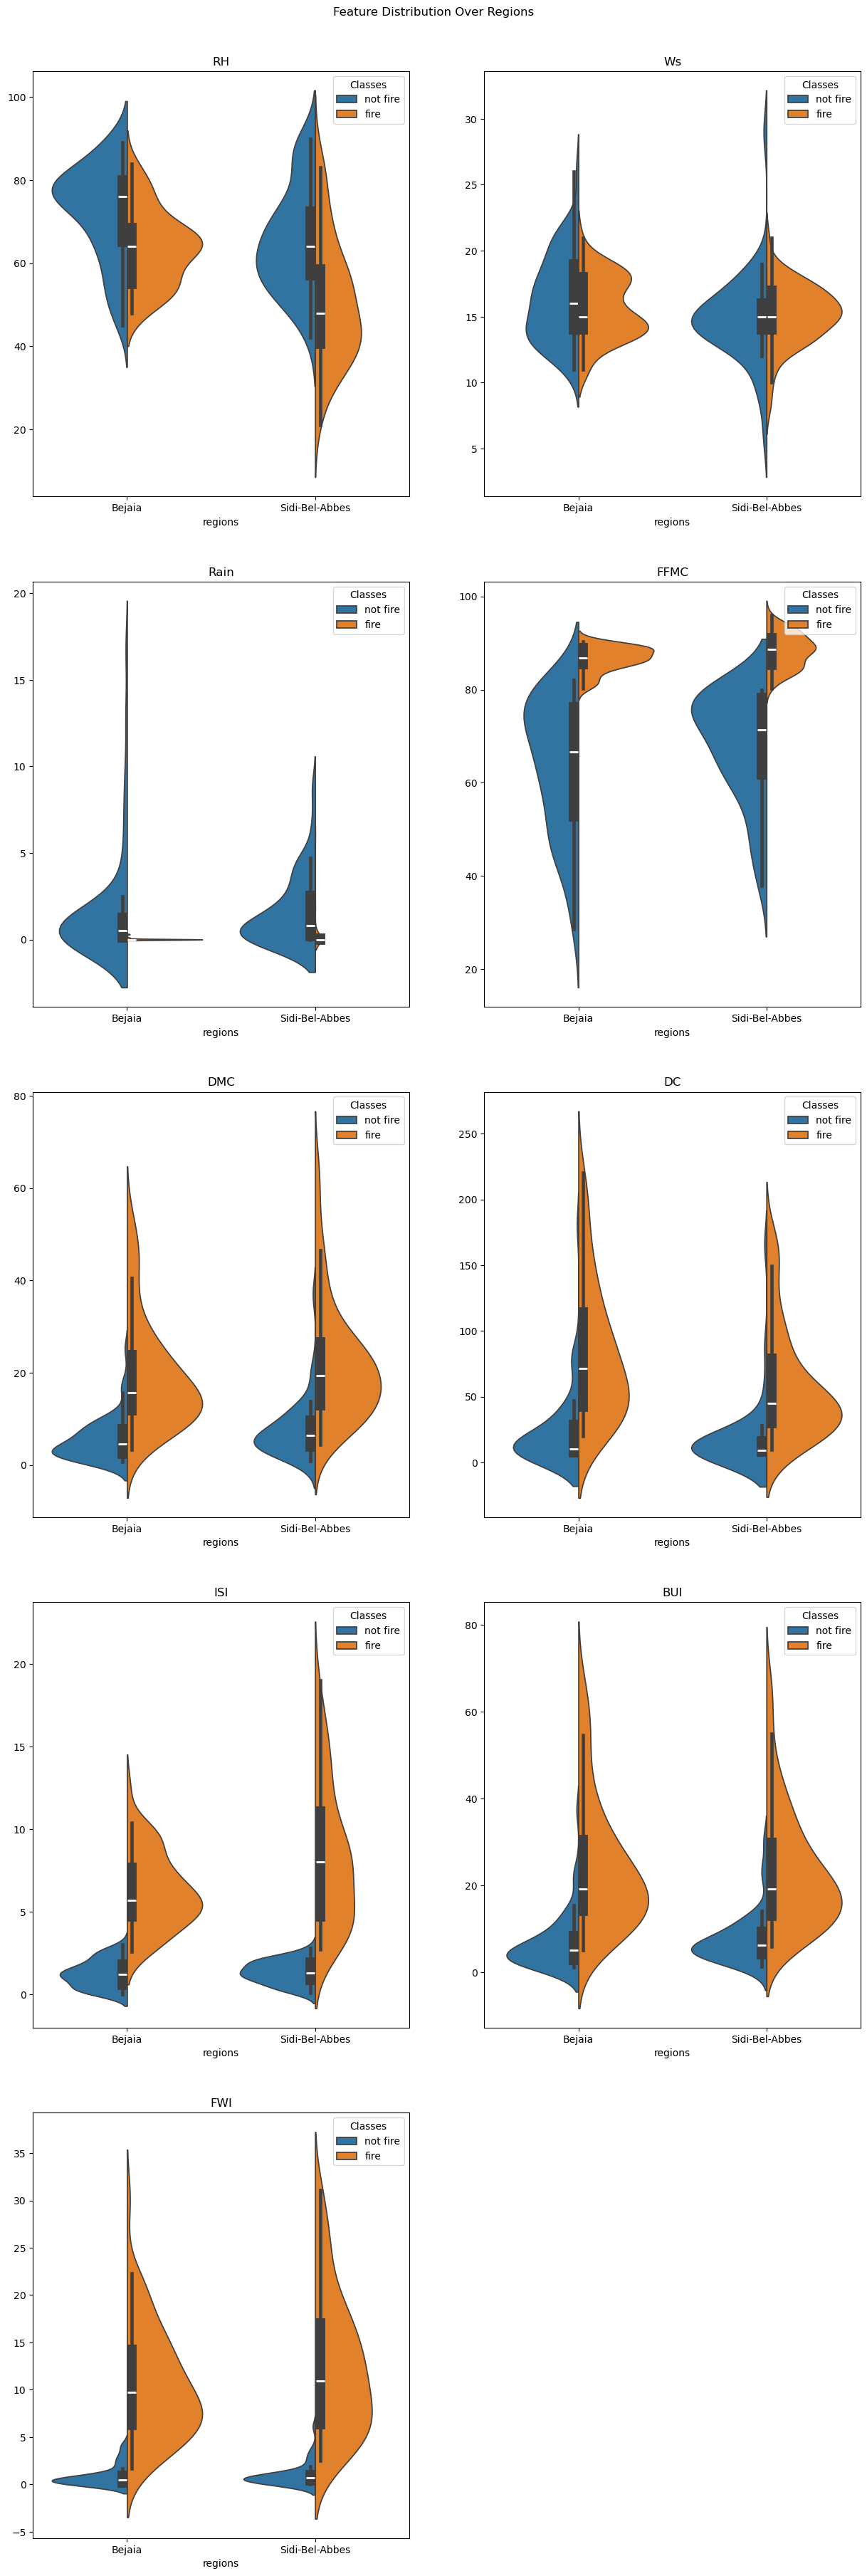

In [44]:
cols = df.columns[2:-1]
fig, axes = plt.subplots(5,2,figsize=(15,45))
axes = axes.flatten()
for i in range(len(cols)):
    ax = axes[i]
    sns.violinplot(df,y=cols[i],x='regions',hue='Classes',split=True,ax=ax,inner_kws={'box_width':10})
    ax.set_ylabel('')
    ax.set_title(cols[i])
axes[-1].remove()
plt.suptitle('Feature Distribution Over Regions',y=0.9)
plt.show()

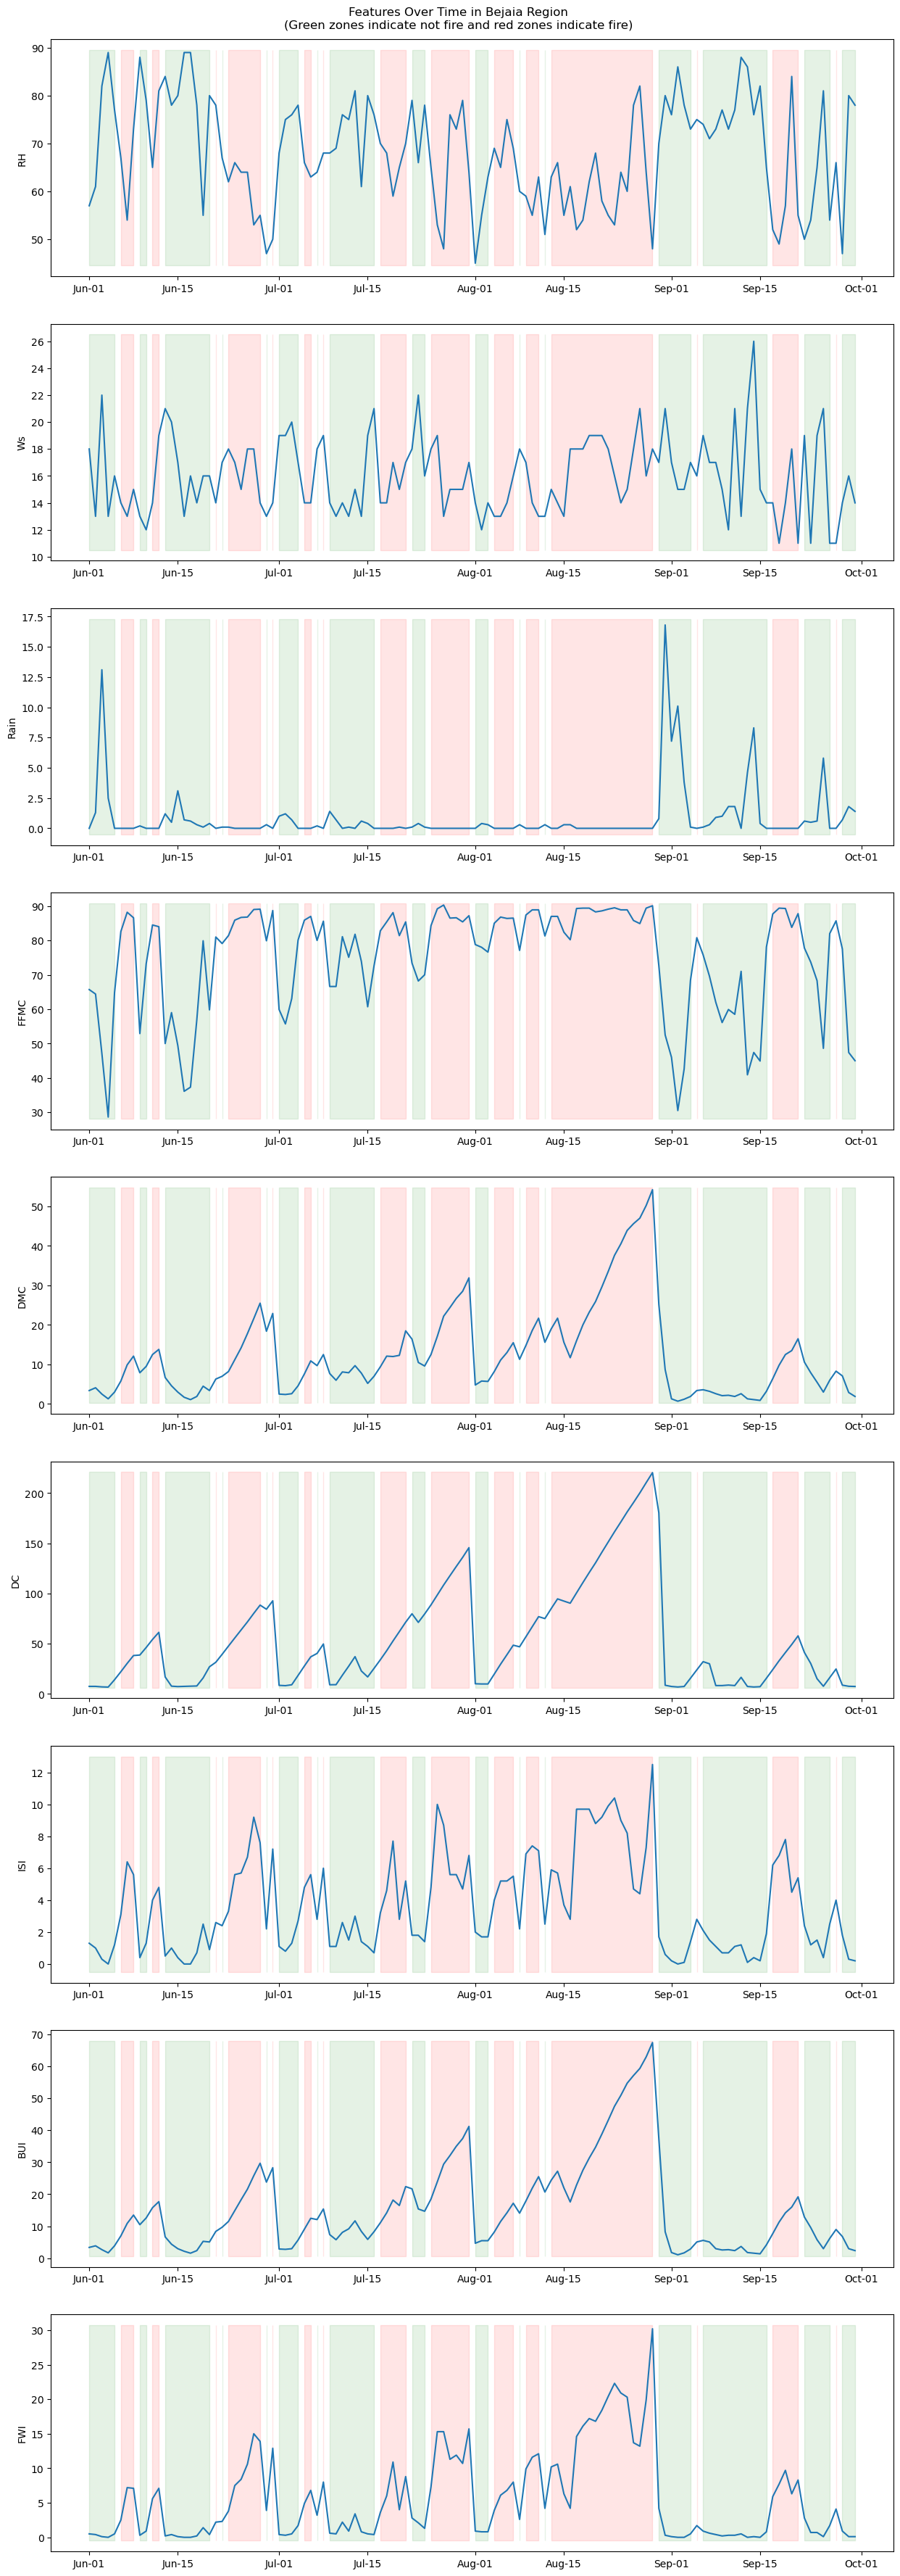

In [45]:
bj_df = df[df.regions=='Bejaia']
fig, axes = plt.subplots(9,1,figsize=(15,45))
axes = axes.flatten()

for i in range(len(cols)-1):
    ax = axes[i]
    col = cols[i]
    sns.lineplot(bj_df,x='Date',y=col,ax=ax)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    ax.fill_between(bj_df['Date'],
                    bj_df[col].min()-.5,
                    bj_df[col].max()+.5,
                    where=(bj_df['Classes']=='not fire'), 
                    color='green', 
                    alpha=0.1)
    ax.fill_between(bj_df['Date'],
                    bj_df[col].min()-.5,
                    bj_df[col].max()+.5,
                    where=(bj_df['Classes']=='fire'), 
                    color='red', 
                   alpha=0.1)
    ax.set_xlabel('')
plt.suptitle('Features Over Time in Bejaia Region\n(Green zones indicate not fire and red zones indicate fire)',y=0.89)
plt.show()

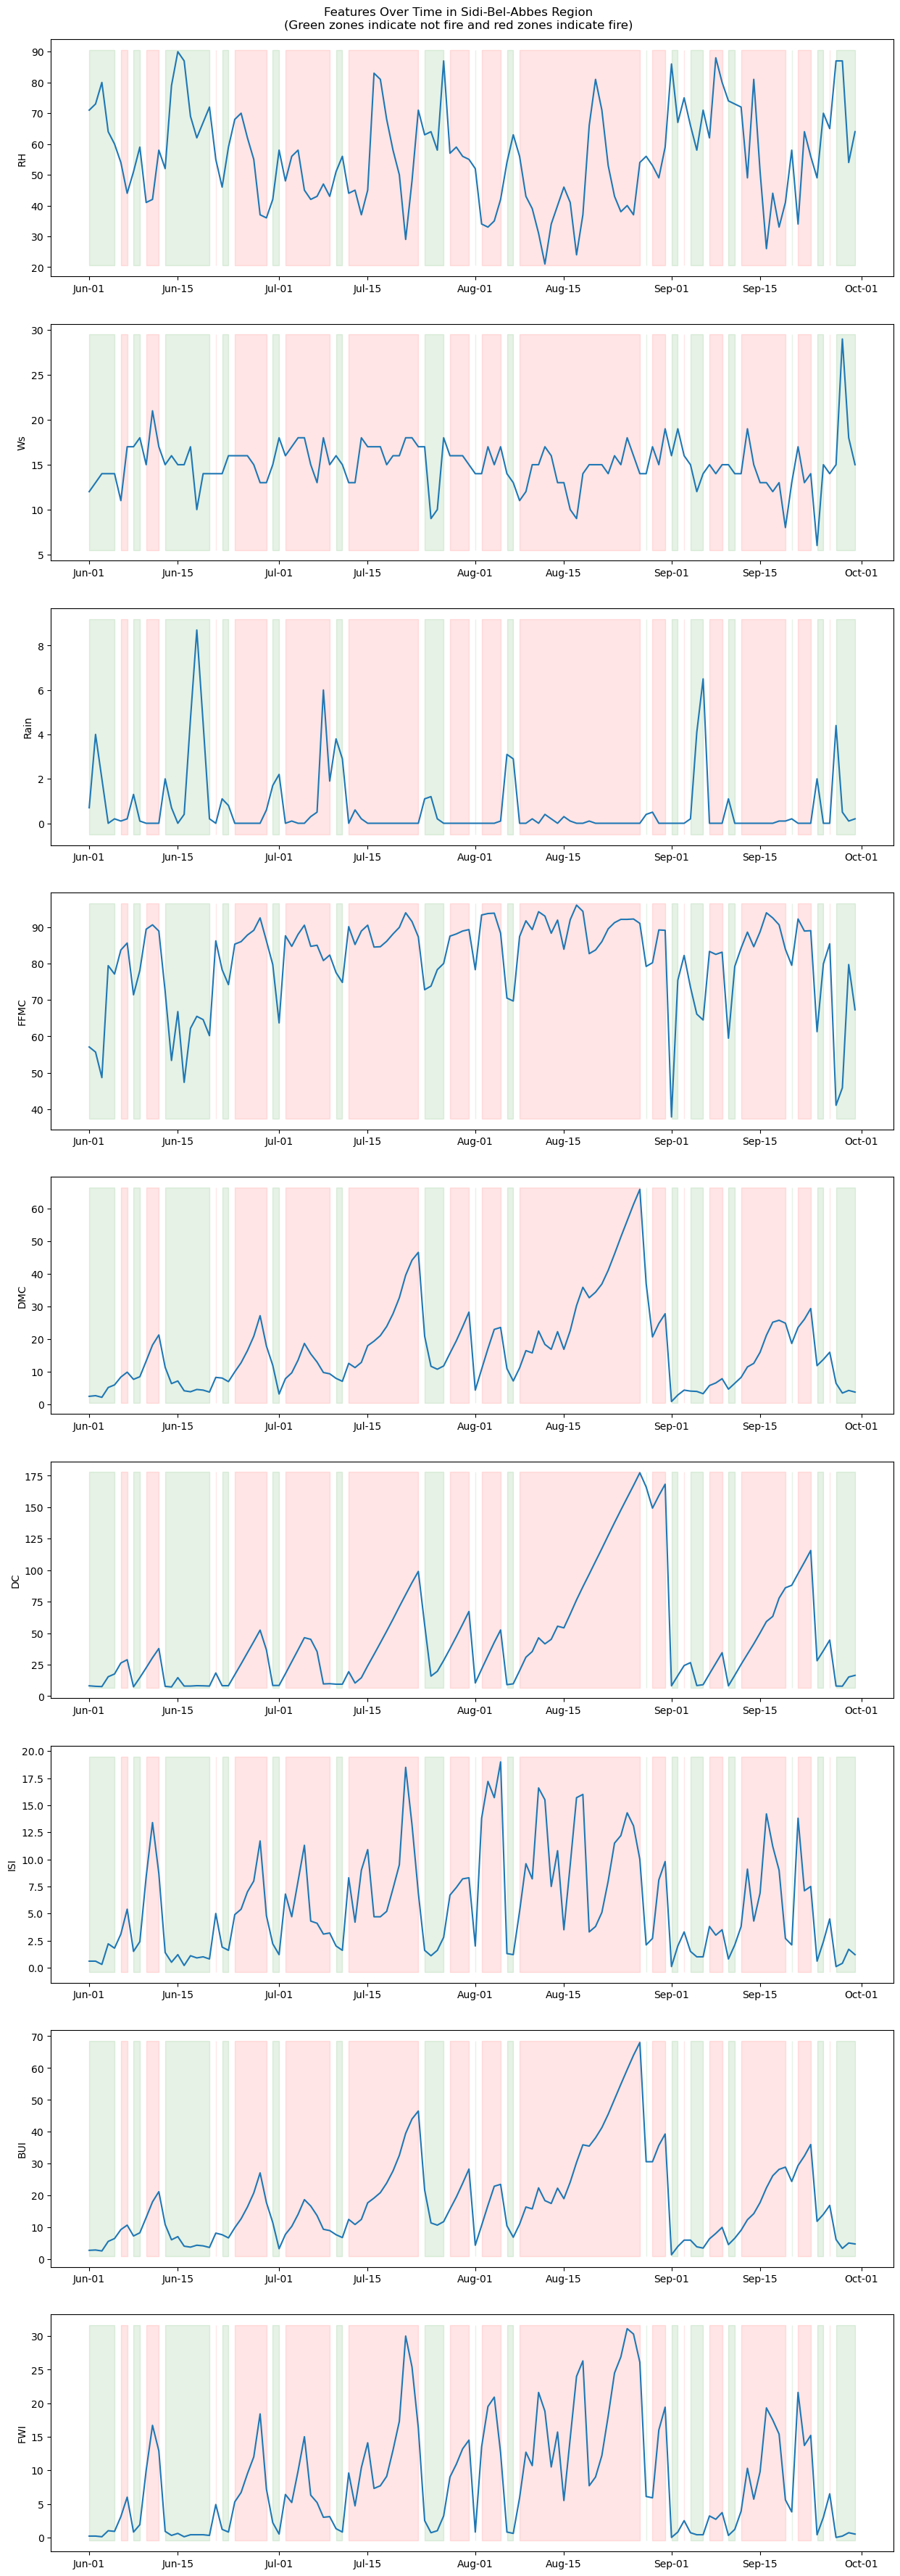

In [46]:
sb_df = df[df.regions=='Sidi-Bel-Abbes']
fig, axes = plt.subplots(9,1,figsize=(15,45))
axes = axes.flatten()

for i in range(len(cols)-1):
    ax = axes[i]
    col = cols[i]
    sns.lineplot(sb_df,x='Date',y=col,ax=ax)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    ax.fill_between(sb_df['Date'],
                    sb_df[col].min()-.5,
                    sb_df[col].max()+.5,
                    where=(sb_df['Classes']=='not fire'), 
                    color='green', 
                    alpha=0.1)
    ax.fill_between(sb_df['Date'],
                    sb_df[col].min()-.5,
                    sb_df[col].max()+.5,
                    where=(sb_df['Classes']=='fire'), 
                    color='red', 
                   alpha=0.1)
    ax.set_xlabel('')
plt.suptitle('Features Over Time in Sidi-Bel-Abbes Region\n(Green zones indicate not fire and red zones indicate fire)',y=0.89)
plt.show()